<a href="https://colab.research.google.com/github/binhdo2310/binhdo/blob/main/EsportIndustryGrowth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#thư viện
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
df_gen = pd.read_csv("/content/drive/MyDrive/Project/GeneralEsportData.csv")
df_his = pd.read_csv("/content/drive/MyDrive/Project/HistoricalEsportData.csv")

In [5]:
df_gen.head()

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,510716.46,375857.63,0.735942,473,265
1,Age of Empires II,1999,Strategy,3253232.59,1139384.57,0.350232,1994,1613
2,Age of Empires III,2005,Strategy,115843.65,41800.00,0.360831,166,163
3,Age of Empires IV,2021,Strategy,994675.03,409117.93,0.411308,542,327
4,Age of Empires Online,2011,Strategy,9806.56,775.00,0.079029,44,50


In [6]:
df_his.head()

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,Command & Conquer: Red Alert,15000.0,8,1
1,1998-01-01,QuakeWorld,15000.0,8,1
2,1998-05-01,Quake II,15000.0,4,1
3,1998-05-01,Total Annihilation,15000.0,2,1
4,1998-05-01,QuakeWorld,300.0,3,1


In [7]:
print(df_gen.info())
print(df_his.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              650 non-null    object 
 1   ReleaseDate       650 non-null    int64  
 2   Genre             650 non-null    object 
 3   TotalEarnings     650 non-null    float64
 4   OfflineEarnings   650 non-null    float64
 5   PercentOffline    583 non-null    float64
 6   TotalPlayers      650 non-null    int64  
 7   TotalTournaments  650 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 40.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9244 entries, 0 to 9243
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         9244 non-null   object 
 1   Game         9244 non-null   object 
 2   Earnings     9244 non-null   float64
 3   Players      9244 non-null   int64  


In [8]:
df_gen.describe()

,ReleaseDate,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
count,650.000000,6.500000e+02,6.500000e+02,583.000000,650.000000,650.000000
mean,2012.576923,2.527759e+06,1.774991e+06,0.659145,226.541538,94.078462
std,7.436703,1.758171e+07,1.377120e+07,0.412233,964.342887,479.807202
min,1981.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,2007.000000,1.000000e+03,0.000000e+00,0.219244,4.000000,1.000000
50%,2015.000000,3.636129e+04,1.500000e+04,0.906896,22.000000,5.000000
75%,2019.000000,2.563600e+05,1.715892e+05,1.000000,99.500000,27.750000
max,2023.000000,3.371080e+08,2.982906e+08,1.000000,16272.000000,7245.000000


In [9]:
df_his.describe()

,Earnings,Players,Tournaments
count,9.244000e+03,9244.000000,9244.000000
mean,1.796551e+05,59.721874,6.633600
std,1.017222e+06,130.098551,12.098553
min,0.000000e+00,0.000000,1.000000
25%,1.075000e+03,6.000000,1.000000
50%,1.026800e+04,16.000000,2.000000
75%,7.150557e+04,51.000000,6.000000
max,4.013865e+07,1719.000000,172.000000


Phần 2: Tiền xử lí dữ liệu


In [10]:
#Trích xuất năm giải đấu được tổ chức
df_his['Year'] = pd.DatetimeIndex(df_his["Date"]).year
print(df_his.head())

         Date                          Game  Earnings  Players  Tournaments  \
0  1998-01-01  Command & Conquer: Red Alert   15000.0        8            1   
1  1998-01-01                    QuakeWorld   15000.0        8            1   
2  1998-05-01                      Quake II   15000.0        4            1   
3  1998-05-01            Total Annihilation   15000.0        2            1   
4  1998-05-01                    QuakeWorld     300.0        3            1   

   Year  
0  1998  
1  1998  
2  1998  
3  1998  
4  1998  


In [11]:
#Kết hợp 2 bộ dữ liệu lại thành 1
df_esports = df_his.merge(df_gen[['Game','Genre','ReleaseDate']], on = 'Game')
print(df_esports.head())

         Date                          Game  Earnings  Players  Tournaments  \
0  1998-01-01  Command & Conquer: Red Alert   15000.0        8            1   
1  1998-01-01                    QuakeWorld   15000.0        8            1   
2  1998-05-01                    QuakeWorld     300.0        3            1   
3  1998-11-01                    QuakeWorld   30000.0       17            1   
4  2001-07-01                    QuakeWorld   15000.0        8            1   

   Year                 Genre  ReleaseDate  
0  1998              Strategy         1996  
1  1998  First-Person Shooter         1996  
2  1998  First-Person Shooter         1996  
3  1998  First-Person Shooter         1996  
4  2001  First-Person Shooter         1996  


In [12]:
#Kiếm tra bộ dữ liệu có bao nhiêu thể loại trò chơi
df_esports.Genre.unique()

array(['Strategy', 'First-Person Shooter', 'Fighting Game', 'Sports',
       'Racing', 'Multiplayer Online Battle Arena', 'Role-Playing Game',
       'Third-Person Shooter', 'Music / Rhythm Game',
       'Collectible Card Game', 'Puzzle Game', 'Battle Royale'],
      dtype=object)

In [13]:
#Đổi tên trò chơi cho đơn giản
df_esports.Genre.replace(
    {
        'First-Person Shooter' : 'FPS',
        'Multiplayer Online Battle Arena' : 'MOBA',
        'Role-Playing Game' : 'RPG',
        'Third-Person Shooter' : 'TPS'
    }, inplace = True
)

df_esports.Game.replace({"Counter-Strike: Global Offensive": 'CS:GO',
                         "PLAYERUNKNOWN'S BATTLEGROUNDS Mobile": 'PUBG Mobile',
                         "PLAYERUNKNOWN’S BATTLEGROUNDS": 'PUBG',
                         "Arena of Valor": 'AoV',
                         "League of Legends": 'LoL'
                         }, inplace = True)

In [14]:
#Kiểm tra giá trị còn thiếu
df_esports.isna().sum()

Date           0
Game           0
Earnings       0
Players        0
Tournaments    0
Year           0
Genre          0
ReleaseDate    0
dtype: int64

In [15]:
#Kiếm tra giá trị trùng lặp
df_esports.loc[df_esports.duplicated()]

,Date,Game,Earnings,Players,Tournaments,Year,Genre,ReleaseDate


Phần 3: Biểu đồ hóa bộ dữ liệu

In [16]:
#Trò chơi có thu nhập hàng đầu
#Tính thu nhập
topgames = df_esports.loc[df_esports.Earnings > 0].copy()
topgames = topgames.groupby(['Game', 'ReleaseDate', 'Genre'])['Earnings'].sum().reset_index()
#Chuyển đổi sang triệu USD
topgames['Earnings'] = round(topgames['Earnings']/1000000)
topgames = topgames.sort_values('Earnings', ascending=False, ignore_index=True)

print(topgames.head(10))

                Game  ReleaseDate          Genre  Earnings
0             Dota 2         2013           MOBA     337.0
1           Fortnite         2017  Battle Royale     170.0
2              CS:GO         2012            FPS     162.0
3                LoL         2009           MOBA     105.0
4                AoV         2015           MOBA      86.0
5        PUBG Mobile         2017  Battle Royale      74.0
6               PUBG         2017  Battle Royale      57.0
7       StarCraft II         2010       Strategy      40.0
8  Rainbow Six Siege         2015            FPS      39.0
9          Overwatch         2016            FPS      35.0


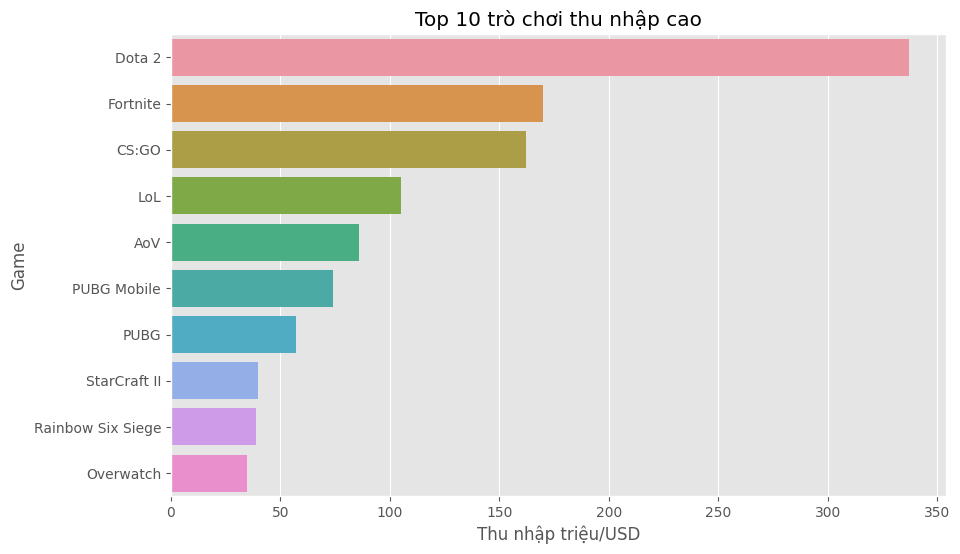

In [18]:
#Bar chart
plt.figure(figsize=(10,6))
sns.barplot(x = 'Earnings',
            y = 'Game',
            data = topgames.head(10),)
plt.xlabel('Thu nhập triệu/USD')
plt.title('Top 10 trò chơi thu nhập cao')
plt.show()


In [19]:
#Thể loại trò chơi có thu nhập cao
genre_counts = topgames.groupby('Genre')['Earnings'].sum()
sorted_genres = genre_counts.sort_values(ascending=False)
top_genres = sorted_genres[:3]
other_genres = sorted_genres[3:].sum()
mod_genre_counts = pd.concat([top_genres, pd.Series([other_genres], index=['Other'])])

print(mod_genre_counts)

MOBA             591.0
FPS              408.0
Battle Royale    339.0
Other            302.0
dtype: float64


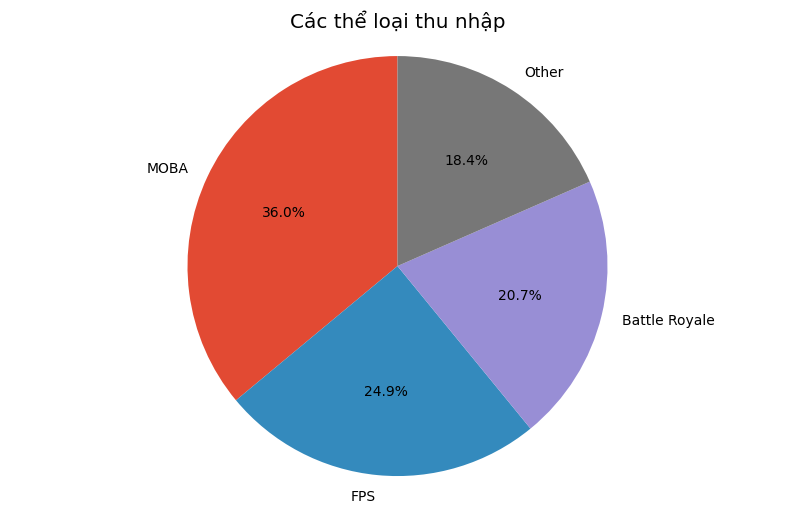

In [20]:
#Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(mod_genre_counts, labels=mod_genre_counts.index, autopct='%.1f%%', startangle=90)
plt.axis('equal')
plt.title('Các thể loại thu nhập')
plt.show()

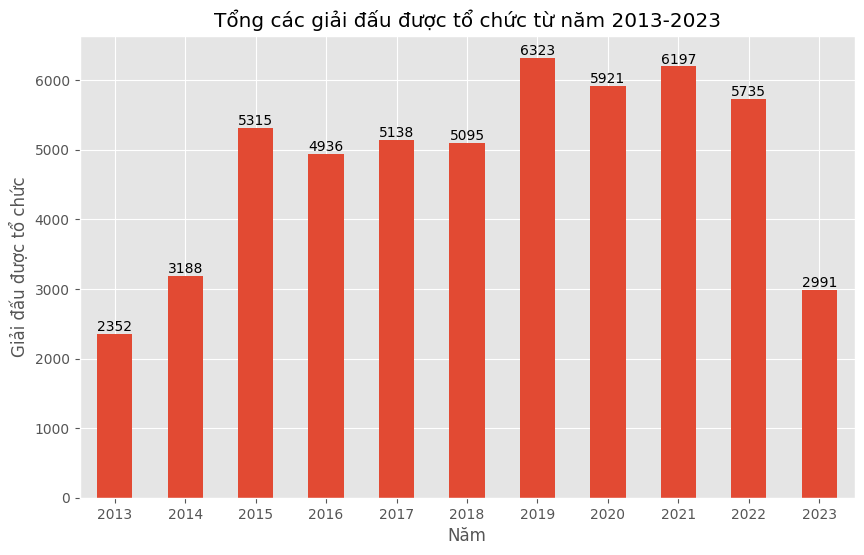

In [31]:
# Lọc dữ liệu các giải đấu được tổ chức từ năm  2013-2023
yearly_tournament_total = df_esports[(df_esports['Tournaments'] > 0) &
                                     (df_esports['Year'] >= 2013) &
                                     (df_esports['Year'] <= 2023)].copy()

# Line Chart
plt.figure(figsize=(10,6))
df_bar = yearly_tournament_total.groupby('Year')['Tournaments'].sum()
ax = df_bar.plot(kind = 'bar')

#Thêm labels
for idx, value in enumerate(df_bar):
    ax.text(idx, value + 1, str(value), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.xlabel('Năm')
plt.ylabel('Giải đấu được tổ chức')
plt.title('Tổng các giải đấu được tổ chức từ năm 2013-2023')
plt.show()

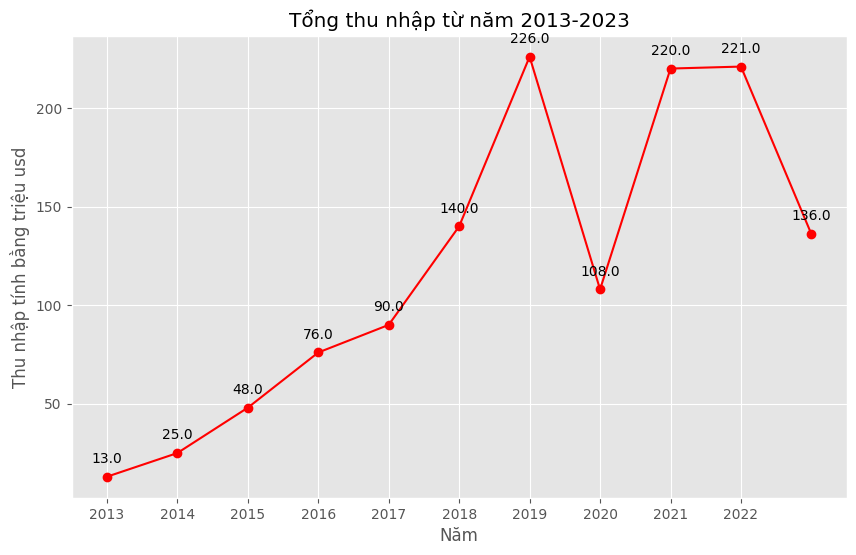

In [33]:
# Lọc dữ liệu kiếm tiền từ 2013 đến 2023
yearly_earnings = df_esports[(df_esports['Earnings'] > 0) &
                             (df_esports['Year'] >= 2013) &
                             (df_esports['Year'] <= 2023)].copy()

# Chuyển đổi thu nhập tính bằng triệu usd
yearly_earnings['Earnings'] = round(yearly_earnings['Earnings']/1000000)
yearly_earnings.reset_index(drop=True, inplace=True)

# line chart
df_line = yearly_earnings.groupby('Year')['Earnings'].sum()
plt.figure(figsize=(10,6))
df_line.plot(kind='line', marker='o', color='red')

# Thêmlabels
for x, y in zip(df_line.index, df_line.values):
    plt.annotate(f'{y}', (x,y), textcoords='offset points', xytext=(0,10), ha='center')

plt.xticks(list(range(2013,2023)))
plt.xlabel('Năm')
plt.ylabel('Thu nhập tính bằng triệu usd')
plt.title('Tổng thu nhập từ năm 2013-2023')
plt.show()

<Figure size 1800x600 with 0 Axes>

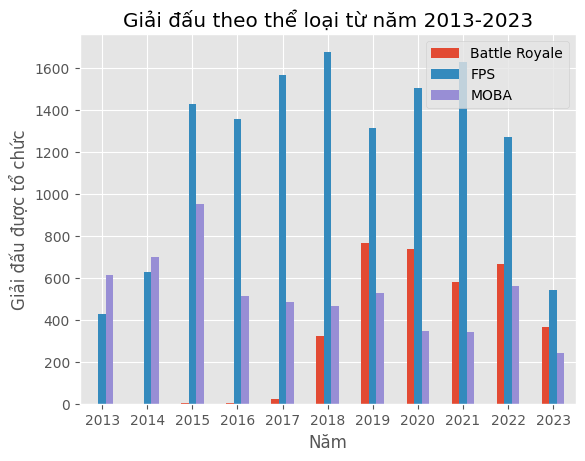

In [34]:
# Lọc dữ liệu cho 3 thể loại hàng đầu
genre_yearly_tournament = df_esports[(df_esports['Tournaments'] > 0) &
                                     (df_esports['Year'] >= 2013) &
                                     (df_esports['Year'] <= 2023) &
                                     (df_esports.Genre.isin(['MOBA', 'Battle Royale', 'FPS']))].copy()
genre_yearly_tournament = genre_yearly_tournament.groupby(['Genre', 'Year'])['Tournaments'].sum().reset_index()
#unique_genre_yearly_tournament = genre_yearly_tournament['Genre'].unique()

# Pivot the data for clustered bar chart
pivot_table = genre_yearly_tournament.pivot_table(index='Year', columns='Genre', values='Tournaments', fill_value=0)

#Creating the clustered bar chart
plt.figure(figsize=(18, 6))
pivot_table.plot(kind='bar')
plt.xlabel('Năm')
plt.ylabel('Giải đấu được tổ chức')
plt.title('Giải đấu theo thể loại từ năm 2013-2023')
plt.legend()
plt.xticks(rotation=0)
plt.show()

In [41]:
print(pivot_table)

Game  AoV  CS:GO  Dota 2  Fortnite  LoL
Year                                   
2013    0    199     134         0  375
2014    0    279     150         0  429
2015    0    721     227         0  311
2016    2    863     153         0  182
2017   15    915     167         0  193
2018   29   1024     181       179  194
2019   28    955     232       487  210
2020   22    627     174       327  120
2021   20    555     100       163  107
2022  103    503     125       318  102
2023   11    206      98       263   86


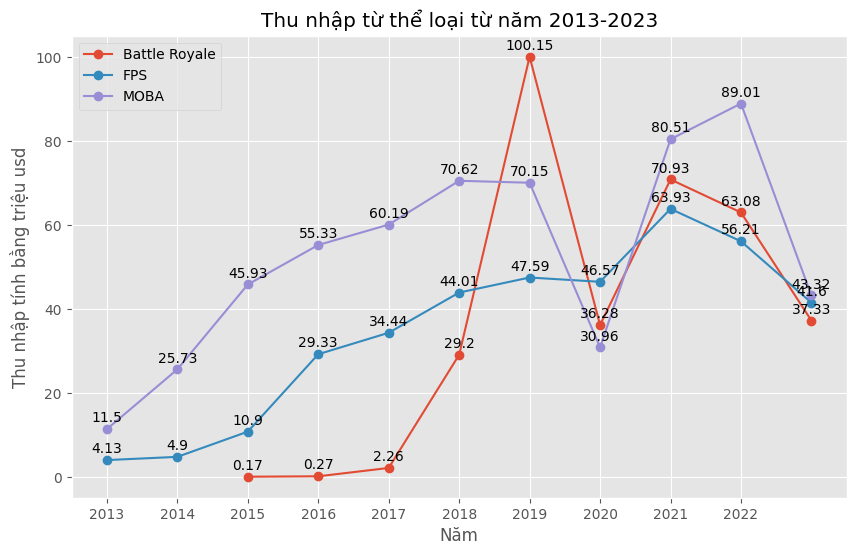

In [36]:
# Lọc dữ liệu cho 3 thể loại hàng đầu
genre_yearly_earnings = df_esports.loc[(df_esports.Earnings > 0) &
                                       (df_esports.Year >= 2013) &
                                       (df_esports.Year <= 2023) &
                                       (df_esports.Genre.isin(['MOBA', 'Battle Royale', 'FPS']))].copy()
genre_yearly_earnings = genre_yearly_earnings.groupby(['Genre', 'Year'])['Earnings'].sum().reset_index()

# Chuyển đổi thu nhập tính bằng triệu usd
genre_yearly_earnings['Earnings'] = (genre_yearly_earnings['Earnings']/1000000).round(2)
genre_yearly_earnings.reset_index(drop=True, inplace=True)
unique_genre_yearly_earnings = genre_yearly_earnings['Genre'].unique()

# Making a line chart and add labels
plt.figure(figsize=(10,6))

for Genre in unique_genre_yearly_earnings:
    genre_data = genre_yearly_earnings[genre_yearly_earnings['Genre'] == Genre]
    plt.plot(genre_data['Year'], genre_data['Earnings'], label=Genre, marker='o')

    for x,y in zip(genre_data['Year'], genre_data['Earnings']):
        plt.annotate(f'{y}', (x,y), textcoords='offset points', xytext=(0,5), ha='center')

plt.xticks(list(range(2013,2023)))
plt.xlabel('Năm')
plt.ylabel('Thu nhập tính bằng triệu usd')
plt.title('Thu nhập từ thể loại từ năm 2013-2023')
plt.legend()
plt.show()

In [40]:
# Tạo 5 trò chơi hàng đầu
top5earnings = topgames['Game'].head(5)
top5earnings

0      Dota 2
1    Fortnite
2       CS:GO
3         LoL
4         AoV
Name: Game, dtype: object

<Figure size 1000x600 with 0 Axes>

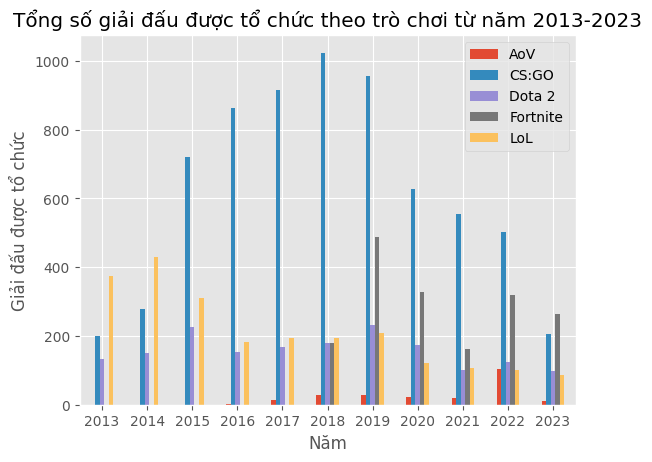

In [38]:
# Tạo tổng số giải đấu theo năm
games_tourney = df_esports.groupby(['Game', 'Year'])['Tournaments'].sum().reset_index().copy()

# Filter and aggregate data for clustered bar chart
topgames_df = df_esports[(df_esports['Game'].isin(top5earnings)) & (df_esports['Year'].between(2013,2023))]
pivot_table = topgames_df.pivot_table(index='Year', columns='Game', values='Tournaments', fill_value=0, aggfunc='sum')

# Creating the Clustered bar chart
plt.figure(figsize=(10,6))
pivot_table.plot(kind='bar')
plt.xlabel('Năm')
plt.ylabel('Giải đấu được tổ chức')
plt.title('Tổng số giải đấu được tổ chức theo trò chơi từ năm 2013-2023')
plt.legend()
plt.xticks(rotation=0)
plt.show()

In [39]:
print(pivot_table)

Game  AoV  CS:GO  Dota 2  Fortnite  LoL
Year                                   
2013    0    199     134         0  375
2014    0    279     150         0  429
2015    0    721     227         0  311
2016    2    863     153         0  182
2017   15    915     167         0  193
2018   29   1024     181       179  194
2019   28    955     232       487  210
2020   22    627     174       327  120
2021   20    555     100       163  107
2022  103    503     125       318  102
2023   11    206      98       263   86


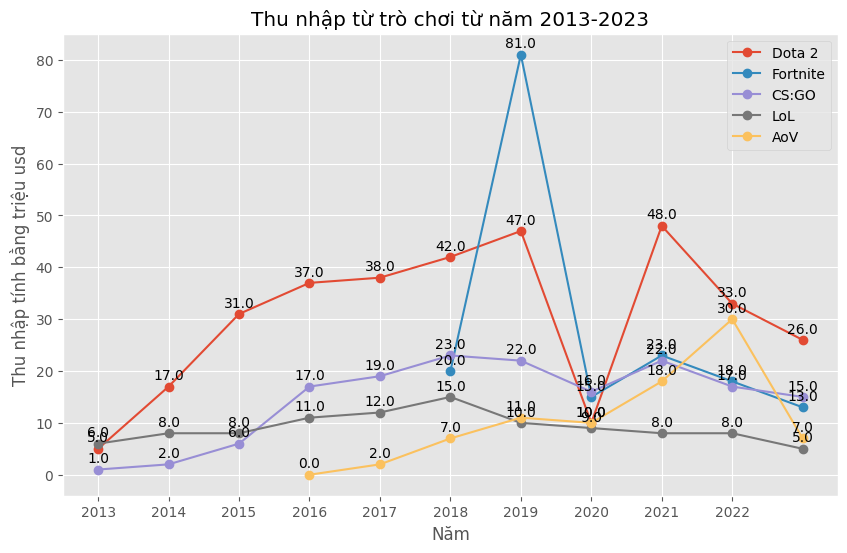

In [42]:
# Tạo tổng thu nhập trò chơi theo năm và chuyển đổi thành triệu usd
games_earning = df_esports.groupby(['Game','Year'])['Earnings'].sum().reset_index()
games_earning['Earnings'] = (games_earning['Earnings']/1000000).round()

# Creating line chart
plt.figure(figsize=(10,6))

for games in top5earnings:
    games_earning_by_years = games_earning[(games_earning['Game'] == games) & (games_earning['Year'].between(2013,2023))]
    plt.plot(games_earning_by_years['Year'], games_earning_by_years['Earnings'], label = games, marker='o')

    for x,y in zip(games_earning_by_years['Year'], games_earning_by_years['Earnings']):
        plt.annotate(f'{y}', (x,y), textcoords='offset points', xytext=(0,5), ha='center')

plt.xticks(list(range(2013,2023)))
plt.xlabel('Năm')
plt.ylabel('Thu nhập tính bằng triệu usd')
plt.title('Thu nhập từ trò chơi từ năm 2013-2023')
plt.legend()
plt.show()
